# Análise exploratória de dados 

### Introdução

Este projeto se trata de detecção de fraudes, e tem como base um dataset com informações de cartões de crédito disponibilizados no site da Kaggle. Nosso objetivo nesta análise é identificar registros de fraudes e quais padrões conseguimos observar nos dados. Após a análise trataremos de algumas possíveis soluções e sem seguida aplicaremos modelo de machine learning para classificar os dados.

### Importando bibliotecas

In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

# Entendimento dos dados

In [2]:
data = pd.read_csv(os.getcwd().replace('code', 'data').replace('Exploratory_analisys','raw')+'\\card_transdata.csv')
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


Até aqui podemos ver que não há valores nulos, e que os dados estão na tipagem correta para a análise, o que vai facilitar nosso trabalho.

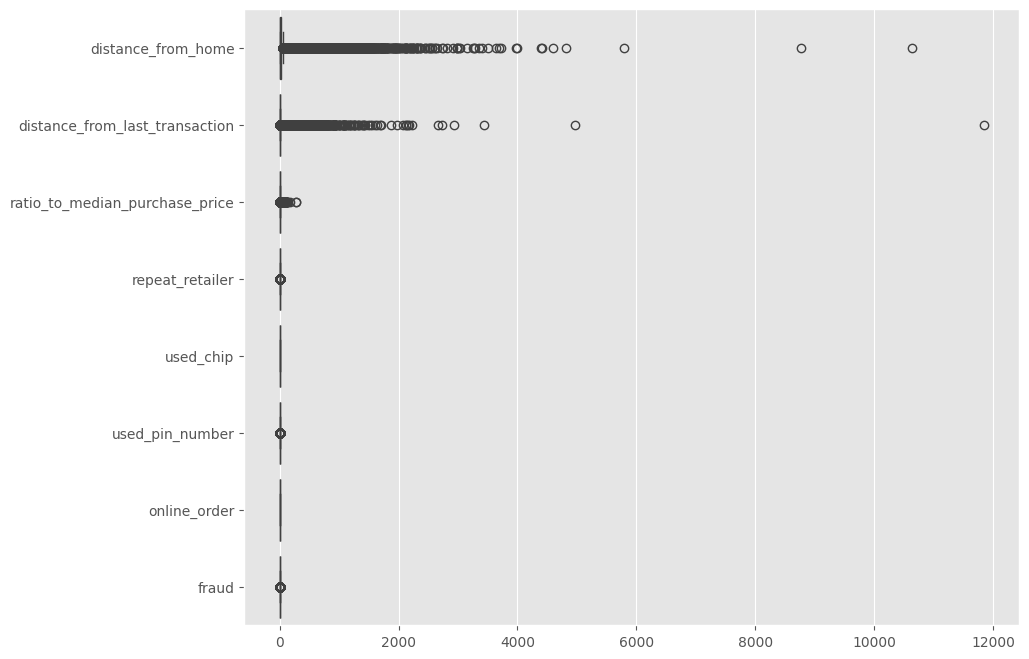

In [4]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data, orient = 'h')
plt.show()

A primeira vista conseguimos perceber que há uma quantidade expressiva de outliers referente à distância da casa da pessoa e suas compras, e também as distâncias das ultimas compras. Até o momento grande parte desses outliers podem ser caracterizados como compras normais, uma vez que a pessoa não compra somente na internet e pode usar o cartão de crédito na região onde mora, ou até mesmo em locais mais distantes no caso de viagens e etc. Porém ainda não desconsidero a hipótese de que possa ser algumas compras fraudulentas. 

Muito importante destacar que nosso conjunto de dados apresenta muitas linhas, e isso poderá atrasar muito nossa análise. Dito isso, posteriormente iremos análisar apenas uma parte deles com amostras.

In [5]:
# criando um novo dataframe com apenas 20% dos dados originais
data20 = data.sample(frac=0.2, random_state=42)
data20

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
987231,0.929509,1.296477,0.361110,0.0,0.0,0.0,1.0,0.0
79954,0.611179,0.208295,3.118884,0.0,0.0,0.0,1.0,0.0
567130,3.956062,0.529194,1.579942,1.0,0.0,0.0,0.0,0.0
500891,21.798902,0.019399,11.416909,1.0,0.0,0.0,0.0,0.0
55399,3.310635,1.707802,2.028915,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
90245,56.686649,0.820179,6.051695,1.0,0.0,1.0,1.0,0.0
639296,5.544863,0.072644,1.350344,1.0,0.0,0.0,1.0,0.0
311939,4.449740,2.045690,9.814511,1.0,1.0,0.0,1.0,1.0
324459,34.624330,0.580115,0.424248,1.0,0.0,0.0,0.0,0.0


In [6]:
data20.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000
mean,26.665327,5.075146,1.820090,0.881615,0.35057,0.100315,0.650490,0.087215
std,66.093964,23.592924,2.819101,0.323064,0.47715,0.300420,0.476816,0.282151
min,0.021322,0.000419,0.005741,0.000000,0.00000,0.000000,0.000000,0.000000
25%,3.866707,0.296265,0.476025,1.000000,0.00000,0.000000,0.000000,0.000000
50%,9.981617,1.000009,0.997039,1.000000,0.00000,0.000000,1.000000,0.000000
75%,25.751134,3.346657,2.096641,1.000000,1.00000,0.000000,1.000000,0.000000
max,10632.723672,2663.513077,267.802942,1.000000,1.00000,1.000000,1.000000,1.000000


## Erro-padrão

Vamos calcular o erro padrão da amostra que separamos do dataset, para concluirmos se representa bem o suficiente os dados originais, afim de uma análise mais fiel.

In [ ]:
standard_error = data20.sem()
print(f'Erro padrão: {standard_error}')

Erro padrão: distance_from_home                0.147791
distance_from_last_transaction    0.052755
ratio_to_median_purchase_price    0.006304
repeat_retailer                   0.000722
used_chip                         0.001067
used_pin_number                   0.000672
online_order                      0.001066
fraud                             0.000631
dtype: float64


Aqui vemos que o erro-padrão é sempre muito próximo de 0, o que indica que nossa amostra reflete bem a população.

In [ ]:
# salvando novo dataset data20
data20_file_path = 'c:\\Users\\God\\Desktop\\DieGod\\Projetos\\Credit-Card-Fraud\\data\\processed\\data20.csv'
data20.to_csv(data20_file_path,index=False)

# Entendimento de negócio

Em seguida, veremos o que um gráfico de histograma pode nos dizer sobre os dados:

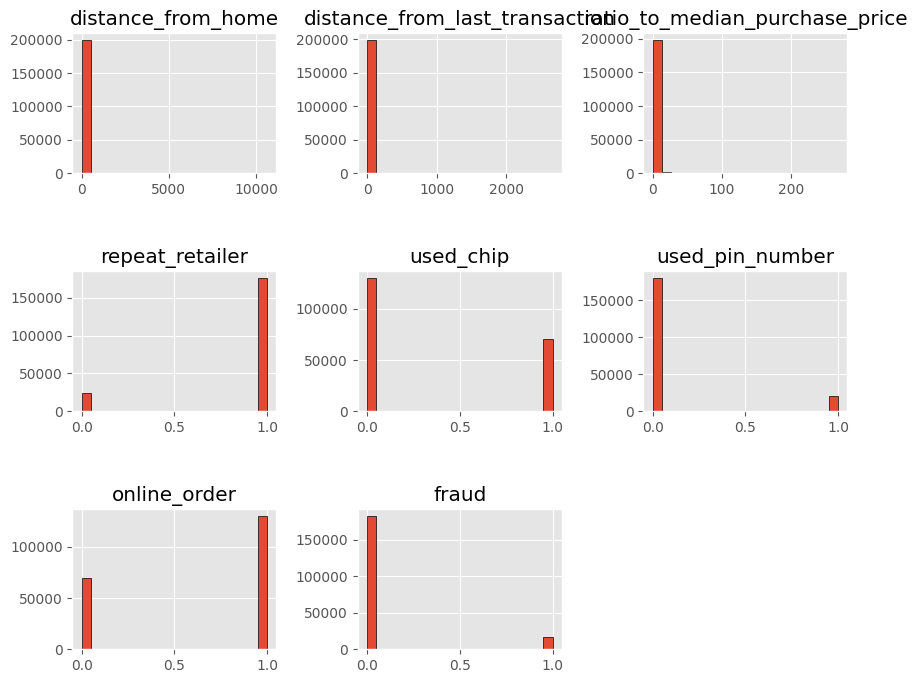

In [ ]:
data20.hist(figsize=(10,8), bins=20, edgecolor='black')
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()

In [ ]:
data20.used_chip.value_counts()

0.0    129886
1.0     70114
Name: used_chip, dtype: int64

Inicialmente podemos perceber que a coluna algo (fraud) não está balanceada, futuramente teremos que levar isso em consideração e balancea-la antes de aplicar modelos de machine learning. Entretanto ainda estamos na etapa de análise.

### Alguns insights até o momento:

 - repead_retailer | A maioria das compras ocorreram nos mesmos varejistas.
  
 - used_chip | Nos mostra que o uso do cartão de crédito físico foi  metade das formas de pagamento, o que sugere que algumas pessoas ainda optam por não usa-lo, e talvez prefiram o modelo de cartão digital.
  
 - used_pin_number | Aqui chama bastante a atenção, o número de registros que usaram a chave PIN foi baixíssima se comparada ao total. Isso nos leva pensar que:
   - As pessoas não se preocupam muito com a segurança dos seus cartões ou não tem tanta conciência dos riscos que correm deixando seus dados tão vulneráveis.
   - Por praticidade e comodidade configuram seus aparelhos para não pedir o PIN ao fazer compras.
   - Deixam seus dados salvos no aparelho para futuras compras.
  
 -  online_order | A maioria das compras são feitas online. Isso pode ser um benefício pela praticidade, e um malefício pois entrega uma facilidade em aplicação de cyber golpes.

 - fraud | Percebemos uma pequena quantidade de fraudes comparada ao número total de registros. 

Para uma vizualização de correlações, usaremos um gráfico de correlações:

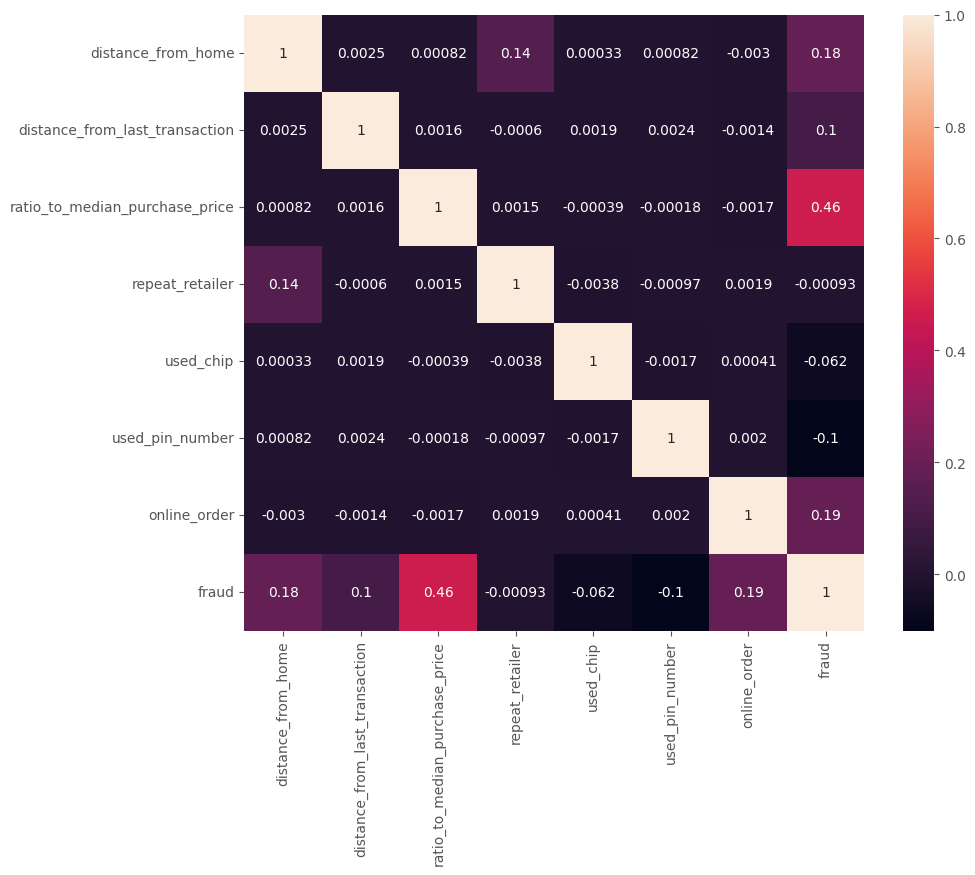

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data20.corr(), annot=True)
plt.show()

#### Notamos:
 - preço médio por compra X fraude: Apesar de uma correlação não MUITO forte de apenas 0.46, conseguimos ver que sim, um dos indicadores para fraudes é a quebra de padrão nas compras é algo a ser considerado como fraude.

 - compra online X fraude: No gráfico a correlação também não é tão alta, mes devemos levar em, consideração que uma parte significante das fraudes nos cartões vem de forma digital, e alguns fatores que consideramos acima nos leva a crer mais nisso.
  
 - distância de casa X fraude: Algo que também faz sentido, na era digitl que vivemos é muito simples para um golpista experiente cometer essas atividades em um local diferente da vítima.
  
 - usando o PIN X fraude: Percebe-se também que nas fraudes não é utilizado o PIN.

 - usando chip de cartão físico X fraude: Algo também a se notar pois os registros de fraudes não apresentam o uso de chip registrado. O que nos leva a crer que ou os cartões podem ter sido clonados ou os crimes podem ter ocorrido por meio de máquinas como computador e celular por exemplo.

 - compras no mesmo logista X fraude: há uma correlação negativa, um registro de fraude muito dificilmente é ocorrido no mesmo varegista.

#### Separando dataframes que possuem fraude e não fraude

In [ ]:
# apenas onde ocorreram fraude
data20_fraud = data20.loc[data20['fraud']==1]

# onde não possue registro de fraude
data20_not_fraud = data20.loc[data20['fraud']==0]

#### Gráfico de barras para analisar os dois dataframes

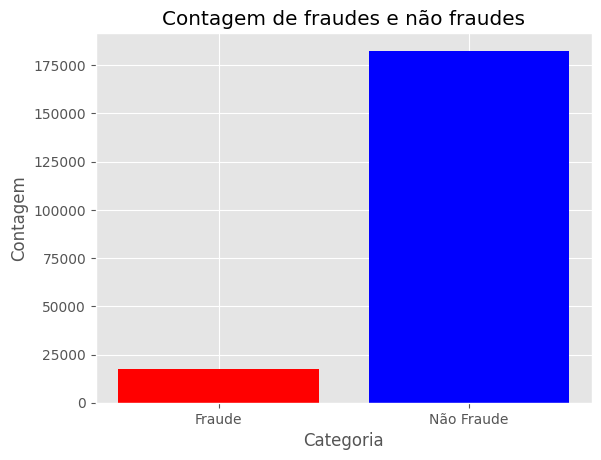

In [ ]:
# conta registros de fraudes no dataset
fraud_counts = data20_fraud['fraud'].value_counts()
not_fraud_counts = data20_not_fraud['fraud'].value_counts()

plt.bar(['Fraude', 'Não Fraude'], [fraud_counts[1], not_fraud_counts[0]], color=['red','blue'])
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.title('Contagem de fraudes e não fraudes')
plt.show()

Pecebemos que a grande maioria dos dados não registra ocorrencia de fraude.

Importante notar que a coluna fraud é nossa variável alvo, logo ela precisaria estar balanceada para quando formos aplicar modelos de ML para classificação. Por tanto antes de responder-mos outras perguntas, irei balancear os dados e salvar em um novo dataframe pra futuramente utilizar-mos.

### Balanceamento de dados com Undersampling(Subamostragem)
Undersampling é um método bastante conhecido de balanceamento de classes, e consiste em reduzir uma classe com contagens de amostras superiores à um número de contagens equivalente a menor classe. No nosso problema é simples de entender, a categoria que não possui fraude é muito maior que a categoria que possui, isso tornaria nosso modelo de machine learning muito ajustado a esses paramêtros nos dados de treino, por conta disso iremos deixar ambas categorias com valores iguais para que não haja viéses.

In [ ]:
# definindo contagem de cada valor das fraudes
class_counts = data20.fraud.value_counts()

# valor mínimo de uma classe nas fraudes
min_class_count = class_counts.min()

# balanceando os valores para que possam possuir quantidades iguais de fraudes e não fraudes
balanced_data = pd.concat([
    data20[data20['fraud'] == target].sample(min_class_count, replace=False) for target in class_counts.index
])

balanced_data = balanced_data.sample(frac=1).reset_index(drop=True)
balanced_data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,14.196208,0.035438,0.521737,1.0,0.0,0.0,1.0,0.0
1,55.334775,0.821496,1.294685,1.0,0.0,0.0,0.0,0.0
2,422.311175,0.074298,5.470336,1.0,0.0,0.0,1.0,1.0
3,10.015390,0.296716,8.927112,1.0,0.0,0.0,1.0,1.0
4,14.723249,1.596679,1.849815,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
34881,97.484213,0.617956,0.778864,1.0,1.0,0.0,1.0,0.0
34882,142.466747,4.113025,4.737315,1.0,0.0,0.0,1.0,1.0
34883,6.733024,0.236667,5.014466,1.0,0.0,0.0,1.0,1.0
34884,36.319664,0.505345,9.667328,1.0,0.0,0.0,1.0,1.0


In [ ]:
balanced_data.fraud.value_counts()

0.0    17443
1.0    17443
Name: fraud, dtype: int64

Perceba que agora ambas as classes possuem a mesma quantidade de amostras.

#### Exportando dataset

In [ ]:
# exportando dataframe com valores balanceados
data_bal_file_path = 'c:\\Users\\God\\Desktop\\DieGod\\Projetos\\Credit-Card-Fraud\\data\\processed\\balanced_data.csv'
balanced_data.to_csv(data_bal_file_path,index=False)

# Voltando para a análise...

### Qual a porcentagem de fraudes em compras online?

In [ ]:
# calcula a quantidade de compras online
online_purchase = data20['online_order'] == 1

# calcula a quantidade de fraudes
fraud = data20['fraud'] == 1

# selelciona apenas as vendas online que ocorreram a fraude
online_fraud = data20.loc[(online_purchase)&(fraud)]

# calcula a porcentagem de fraudes em compras online
porc_online_fraud = len(online_fraud)/fraud.sum() *100
print(f'{round(porc_online_fraud,1)}%')

94.5%


 - Temos um total de 130098 registros de compras online nesta amostra.
 - Um total de 17443 de fraudes na amostra.
 - De 17443 fraudes, 16482 são online.
  
#### 94,5% das fraudes são transações online.
 - Consequentemente apenas 4,5% das fraudes não são detectadas pelo modelo de compra online.

### Analisando a diferença de gastos dos registros com fraude e sem fraude


In [ ]:
fraud_describe = data20.ratio_to_median_purchase_price[data20.fraud == 1]
fraud_describe.describe()

count    17443.000000
mean         5.995095
std          5.386539
min          0.025146
25%          3.806527
50%          5.074410
75%          7.334551
max        101.985360
Name: ratio_to_median_purchase_price, dtype: float64

In [ ]:
not_fraud_describe = data20.ratio_to_median_purchase_price[data20.fraud == 0]
not_fraud_describe.describe()

count    182557.000000
mean          1.421176
std           2.027291
min           0.005741
25%           0.449620
50%           0.911872
75%           1.782679
max         267.802942
Name: ratio_to_median_purchase_price, dtype: float64

#### diante a análise da proporção de compra mediana, conseguimos identificar que em média um fraudador costuma gastar cerca de 5x mais, e que 75% dos gastos chegam a ser até 7x mais que o comum.


### Qual a probabilidade de ser fraude caso o valor de compra ultrapasse a média?

In [ ]:
# valor de compra médio
mean_purchase = data20.ratio_to_median_purchase_price.mean()

# valores maiores que a média
greater_mean = data20.ratio_to_median_purchase_price[data20['ratio_to_median_purchase_price'] > mean_purchase]

# conta numero de valores maiores que a média
num_greater_mean = len(greater_mean)

# probabilidade de um valor ser maior que a média
prob_greater_purchase = round(num_greater_mean/len(data20['ratio_to_median_purchase_price']) * 100,2)

# probabilidade de ser fraude
prob_fraud = round(len(fraud_describe)/len(data20.fraud) * 100,2) 

# calculando probabilidade de o valor ser maior que a média dado que seja fraude
greater_mean_fraud = len(data20[(data20['fraud'] == 1) & (data20['ratio_to_median_purchase_price'] > mean_purchase)]) / len(data20[data20['fraud'] == 1])

print(f'A probabilidade de um valor ser maior que a média é: {prob_greater_purchase}%, e de ser fraude é: {prob_fraud}%')
print(f'A probabilidade de ser fraude caso o valor médio de compra seja maior que a média é: {round(greater_mean_fraud *100,2)}%')

A probabilidade de um valor ser maior que a média é: 29.15%, e de ser fraude é: 8.72%
A probabilidade de ser fraude caso o valor médio de compra seja maior que a média é: 79.97%


Com essa probabilidade de quase 80%, nos leva a ter uma base de confiança mais sólida quando o valor de compra for muito maior do que o que a pessoa normalmente compra, invés de ficar-mos somente no achismo apesar de parecer óbvio.

# Conclusão

Bem, diante nossa análise conseguimos identificar alguns padrões que costumar ocorrer em casos de fraude de cartão de crédito, os principais são:
 - A maioria dos golpes ocorrem de modo online. Isso faz sentido, como o desenvolvimento da tecnologia vem sendo maior a cada dia, mês, ano que passa, é natural que pessoas utilizem a mesma para praticar delitos. Apesar de muitos bancos investirem rios de dinheiro na área de cyber segurança ainda está sussetível a tais ataques. Isso não significa que pessoas não possam ter seus cartões fraudados no caso de passarem a usar apenas o chip físico, porém é perceptível através desta análise que os riscos são menores.
 - Quando uma compra feita no cartão ultrapassa muito a média que o dono do cartão gasta, existe um forte indicador que possa ser fraude.

Resuma as principais descobertas e insights da análise.

Faça recomendações ou sugira ações com base nos resultados obtidos.

Destaque quaisquer áreas que requerem investigação adicional ou melhorias.